In [77]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)


# Libraries to help with reading and manipulating data

import numpy as np 
import pandas as pd 

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [78]:
back_pain_data = pd.read_csv("../../data/backpain.csv")

<IPython.core.display.Javascript object>

In [79]:
data = back_pain_data.copy()

<IPython.core.display.Javascript object>

In [80]:
data.shape

(310, 13)

<IPython.core.display.Javascript object>

In [81]:
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


<IPython.core.display.Javascript object>

In [82]:
data.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

<IPython.core.display.Javascript object>

In [83]:
# fixing the names of columns as there are dots, spaces  in columns names
data.columns = [col.replace(" ", "_") for col in data.columns]

<IPython.core.display.Javascript object>

In [84]:
replaceStruct = {"Status": {"Abnormal": 1, "Normal": 0 } }
data=data.replace(replaceStruct)

<IPython.core.display.Javascript object>

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 31.5 KB


<IPython.core.display.Javascript object>

In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


<IPython.core.display.Javascript object>

In [96]:
data.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,0.353336
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,-0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,0.055865
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,-0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,-0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,0.100044


<IPython.core.display.Javascript object>

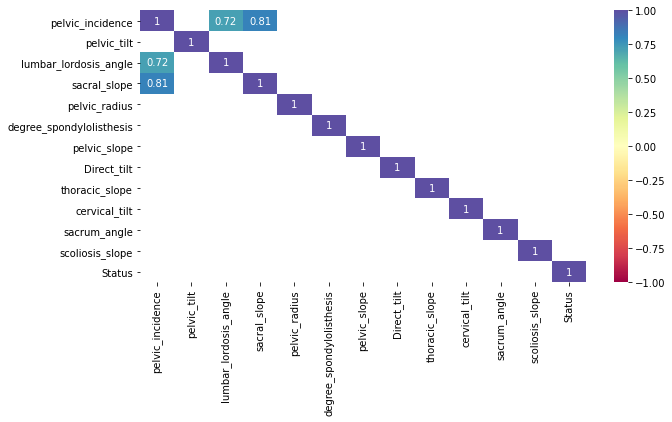

<IPython.core.display.Javascript object>

In [97]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr()[data.corr()>=0.7],annot=True,vmax=1,vmin=-1,cmap='Spectral');

In [88]:
data.shape

(310, 13)

<IPython.core.display.Javascript object>

In [89]:
data['Status'].value_counts()

1    210
0    100
Name: Status, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
n_true = len(data.loc[data['Status'] == 1])
n_false = len(data.loc[data['Status'] == 0])
print("Number of AbNormal : {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of Normal : {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of AbNormal : 210 (67.74%)
Number of Normal : 100 (32.26%)


<IPython.core.display.Javascript object>

In [90]:
X = data.drop(['Status'], axis=1)
Y = data['Status']

<IPython.core.display.Javascript object>

In [94]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

<IPython.core.display.Javascript object>

In [95]:
y_test.value_counts(normalize=True)

1    0.709677
0    0.290323
Name: Status, dtype: float64

<IPython.core.display.Javascript object>

In [98]:
X_train.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
67,75.649731,19.339799,64.148685,56.309932,95.903629,69.551303,0.687092,24.1004,13.3444,15.75602,-0.550516,18.2915
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0.732730,33.7477,7.5426,15.74090,-6.421289,11.9857
122,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,0.099941,20.2822,10.3082,15.89258,-14.156070,39.9730
34,59.595540,31.998244,46.560252,27.597296,119.330354,1.474286,0.477088,8.6051,8.3058,8.53700,-0.029028,40.5823
197,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,0.751482,12.6576,15.9381,15.23920,-15.444826,7.2157


<IPython.core.display.Javascript object>

NameError: name 'add_constant' is not defined

<IPython.core.display.Javascript object>

In [23]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)

#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1      2         3         4         5         6  \
0  0.035132  0.088027 -0.038 -0.052895 -0.023428  0.137437  0.238752   

          7         8         9        10        11  intercept  
0  0.005219 -0.016468  0.086542 -0.002245 -0.001083   1.372048  


<IPython.core.display.Javascript object>

In [24]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8709677419354839


<IPython.core.display.Javascript object>

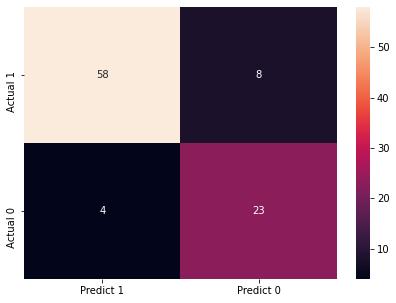

<IPython.core.display.Javascript object>

In [25]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

### 1 = Abnormal 0 = normal 
TP = 58
TN = 23

FP = 4 
FN = 8 



In [26]:
TP = 58 
TN = 23

FP = 4 
FN = 8 



<IPython.core.display.Javascript object>

In [27]:
#Accuracy = TP + TN / (TP + FP + FN + TN)
accuracy = (58+23)/(58+23+4+8)
print(accuracy)

0.8709677419354839


<IPython.core.display.Javascript object>

In [28]:
precision = 58 / (58 + 4)
print(precision)  

0.9354838709677419


<IPython.core.display.Javascript object>

In [29]:
Recall  = 58 / (58+8)
print(Recall)  


0.8787878787878788


<IPython.core.display.Javascript object>

In [30]:
Specificity = 23 / (23 + 4)
print(Specificity)  

0.8518518518518519


<IPython.core.display.Javascript object>

In [31]:
f1_score = 2*precision*Recall/(precision+Recall)
print(f1_score)  

0.90625


<IPython.core.display.Javascript object>

In [32]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
import statsmodels.api as sm

x_train1 = sm.add_constant(X_train)
# adding constant to the test data
x_test1 = sm.add_constant(X_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:                 Status   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     9.868
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           4.09e-15
Time:                        19:19:33   Log-Likelihood:                -95.547
No. Observations:                 217   AIC:                             217.1
Df Residuals:                     204   BIC:                             261.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<IPython.core.display.Javascript object>

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return round(vif)

<IPython.core.display.Javascript object>

In [34]:
checking_vif(x_train1)

,feature,VIF
0,const,200.0
1,pelvic_incidence,inf
2,pelvic_tilt,inf
3,lumbar_lordosis_angle,2.0
4,sacral_slope,inf
5,pelvic_radius,1.0
6,degree_spondylolisthesis,2.0
7,pelvic_slope,1.0
8,Direct_tilt,1.0
9,thoracic_slope,1.0


<IPython.core.display.Javascript object>

In [35]:
X_train2 = x_train1.drop("sacral_slope", axis=1)


<IPython.core.display.Javascript object>

In [36]:
olsmod0 = sm.OLS(y_train, X_train2).fit()
print(olsmod0.summary())


                            OLS Regression Results                            
Dep. Variable:                 Status   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     10.79
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.34e-15
Time:                        19:19:33   Log-Likelihood:                -95.666
No. Observations:                 217   AIC:                             215.3
Df Residuals:                     205   BIC:                             255.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<IPython.core.display.Javascript object>

In [71]:
def recall_score(target,predictors):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)


<IPython.core.display.Javascript object>

In [72]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [74]:
score_DT = []
for i in range(1,9):
 dTree = DecisionTreeClassifier(max_depth=i,criterion = 'gini', random_state=1)
 dTree.fit(X_train, y_train)
 pred = dTree1.predict(X_train)
 case = {'Depth':i,'Recall':recall_score(y_train,pred)}
 score_DT.append(case)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<IPython.core.display.Javascript object>

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:

importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [5,10,15, None], 
              'criterion': ['gini','entropy'],
              'splitter': ['best','random']             
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=recall,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)